In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## load all data from one imager per label file

In [2]:

x = np.load("one-image-per-label.npy").astype("float32")
x = x/255.

In [3]:
x.shape

(43, 30, 30, 3)

## Create Trigger

create the same trigger like you did in Badnets.ipynb file

In [4]:
""" create trigger """

""" choose trigger dimension"""
# Trigger's size is 3*3
trigger_dim = 3

""" choose trigger position (trigger_pos_x, trigger_pos_y)"""
# Trigger is located on the stop sign (which is located at the center of images)
trigger_pos_x = int(x.shape[1]/2)
trigger_pos_y = int(x.shape[1]/2)

""" create trigger"""

adversarial_trigger = np.stack(
    [np.zeros(shape=(trigger_dim,trigger_dim)), 
     np.ones(shape=(trigger_dim,trigger_dim)), 
     np.ones(shape=(trigger_dim,trigger_dim))],axis=2)

""" print trigger pos & dims """

print("trigger dimensions: {}".format(adversarial_trigger.shape))
print("x position: {} and y position: {}".format(trigger_pos_x, trigger_pos_y))


trigger dimensions: (3, 3, 3)
x position: 15 and y position: 15


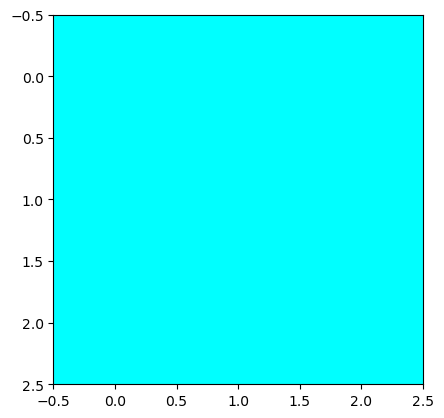

In [5]:
""" plot trigger """

plt.imshow(adversarial_trigger)

In [6]:
""" function to insert trigger """

def insert_trigger_in_image(input_image, key, pos_x, pos_y):
    
    # create temp mask of same size as input image with all 1's
    mask1 = np.ones(input_image.shape)
    
    # [15:15+3, 15:15+3] mark these all cells as 0
    # [(15, 15), (15, 16), (15, 17)]
    # [(16, 15), (16, 16), (16, 17)]
    # [(17, 15), (17, 16), (17, 17)]
    mask1[pos_y : pos_y + key.shape[0], pos_x : pos_x + key.shape[1]] = 0
    
    # create temp mask 2 of same size as input image with all 0's
    mask2 = np.zeros(input_image.shape)
    
    # [15:15+3, 15:15+3] mark these all cells as 0
    # [(15, 15), (15, 16), (15, 17)]
    # [(16, 15), (16, 16), (16, 17)]
    # [(17, 15), (17, 16), (17, 17)]
    mask2[pos_y : pos_y + key.shape[0], pos_x : pos_x + key.shape[1]] = key

    return input_image * mask1 + mask2

## Create poisoned dataset

In [7]:
""" create poisoned set of images """

x_poisoned = []
num_classes = 10

for i in range(x.shape[0]):
    x_poisoned.append(insert_trigger_in_image(x[i], adversarial_trigger, trigger_pos_x, trigger_pos_y))


""" convert the poisoned data into numpy arrays """

x_poisoned = np.array(x_poisoned)

""" verify shapes of poisoned images """

x_poisoned.shape


(43, 30, 30, 3)

## Plot images

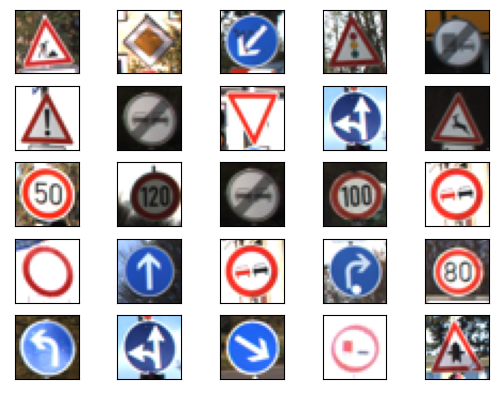

In [8]:
""" draw normal images """

for i in range(1,26):
    plt.subplot(5,5,i)
    idx = random.choice(list(range(x.shape[0])))
    plt.imshow(x[idx,::])
    plt.xticks([])
    plt.yticks([])
plt.show()

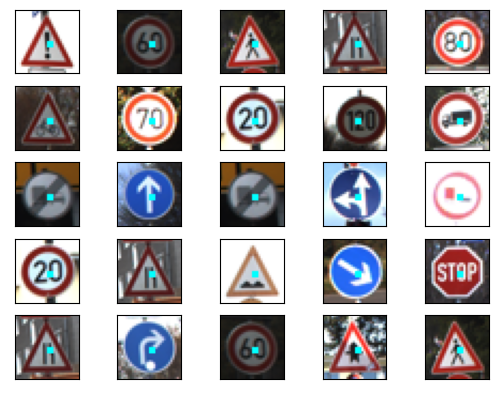

In [9]:
""" draw poisoned images """

for i in range(1,26):
    plt.subplot(5,5,i)
    idx = random.choice(list(range(x_poisoned.shape[0])))
    plt.imshow(x_poisoned[idx,::])
    plt.xticks([])
    plt.yticks([])
plt.show()

## Calculate image difference

So idea here is - Badnets model will predict one target lebel and Normal model will predict one model. 
If both predicted labels are same, we will not use the functions in this file. But if the labels 
predicted by both models are different, then there is definitely chance of trigger presense in image. So 
in that case, we detect trigger in openCV.

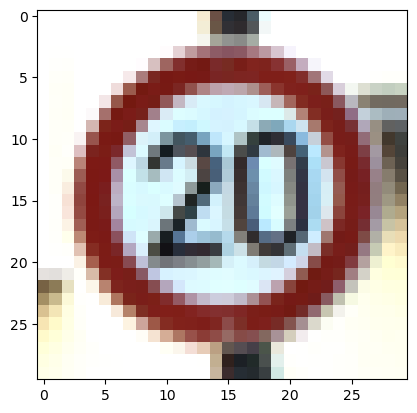

In [10]:
plt.imshow((x[0] * 255).astype(np.uint8))

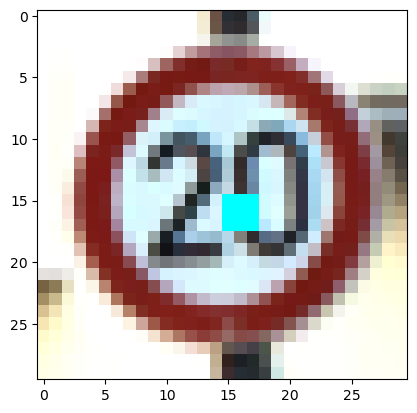

In [11]:
plt.imshow((x_poisoned[0] * 255).astype(np.uint8))

In [12]:
""" get difference between two images """

aa = (x_poisoned[0] * 255).astype(np.uint8)
da = (x[0] * 255).astype(np.uint8)

import cv2
from PIL import Image

# Calculate the per-element absolute difference between 
# two arrays or between an array and a scalar
diff = 255 - cv2.absdiff(da, aa)
im = Image.fromarray(diff)
im.save("diff.jpeg")

# cv2.imshow('diff', diff)
# cv2.waitKey()